In [7]:
!pip install pandas numpy scikit-learn xgboost lightgbm catboost shap lime matplotlib

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("C:/Users/xison/Desktop/Í∏∞Í≥ÑÌïôÏäµ_ÌåÄÌîå_Îç∞Ïù¥ÌÑ∞ÏÖã/201807_ÌöåÏúà_ÌÜµÌï©_ÎÖ∏Îßê.csv")

In [10]:
print(df.columns.tolist())

['ÎÇ®ÎÖÄÍµ¨Î∂ÑÏΩîÎìú', 'Ïó∞Î†π', 'ÌöåÏõêÏó¨Î∂Ä_Ïù¥Ïö©Í∞ÄÎä•', 'ÌöåÏõêÏó¨Î∂Ä_Ïù¥Ïö©Í∞ÄÎä•_CA', 'ÌöåÏõêÏó¨Î∂Ä_Ïù¥Ïö©Í∞ÄÎä•_Ïπ¥ÎìúÎ°†', 'ÏÜåÏßÄÏó¨Î∂Ä_Ïã†Ïö©', 'ÏÜåÏßÄÏπ¥ÎìúÏàò_Ïú†Ìö®_Ïã†Ïö©', 'ÏÜåÏßÄÏπ¥ÎìúÏàò_Ïù¥Ïö©Í∞ÄÎä•_Ïã†Ïö©', 'ÏûÖÌöåÏùºÏûê_Ïã†Ïö©', 'ÏûÖÌöåÍ≤ΩÍ≥ºÍ∞úÏõîÏàò_Ïã†Ïö©', 'ÌöåÏõêÏó¨Î∂Ä_Ïó∞Ï≤¥', 'Ïù¥Ïö©Í±∞Ï†àÏó¨Î∂Ä_Ïπ¥ÎìúÎ°†', 'ÎèôÏùòÏó¨Î∂Ä_ÌïúÎèÑÏ¶ùÏï°ÏïàÎÇ¥', 'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_TM', 'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_DM', 'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_Î©îÏùº', 'ÏàòÏã†Í±∞Î∂ÄÏó¨Î∂Ä_SMS', 'ÌÉàÌöåÌöüÏàò_ÎàÑÏ†Å', 'ÏµúÏ¢ÖÌÉàÌöåÌõÑÍ≤ΩÍ≥ºÏõî', 'ÌÉàÌöåÌöüÏàò_Î∞úÍ∏â6Í∞úÏõîÏù¥ÎÇ¥', 'ÌÉàÌöåÌöüÏàò_Î∞úÍ∏â1ÎÖÑÏù¥ÎÇ¥', 'ÎßàÏºÄÌåÖÎèôÏùòÏó¨Î∂Ä', 'Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©', 'Ïú†Ìö®Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±', 'Ïú†Ìö®Ïπ¥ÎìúÏàò_Ï≤¥ÌÅ¨', 'Ïú†Ìö®Ïπ¥ÎìúÏàò_Ï≤¥ÌÅ¨_Í∞ÄÏ°±', 'Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©', 'Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ïã†Ïö©_Í∞ÄÏ°±', 'Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Í∞ÄÎä•Ïπ¥ÎìúÏàò_Ï≤¥ÌÅ¨_Í∞ÄÏ°±', 'Ïù¥Ïö©Ïπ¥ÎìúÏàò_Ïã†Ïö©Ï≤¥ÌÅ¨', 'Ïù¥Ïö©Ïπ¥ÎìúÏà

In [11]:
# RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂ÄÍ∞Ä 1Ïù∏ ÏÉòÌîåÎßå ÌïÑÌÑ∞ÎßÅ
df = df[df["RVÏ†ÑÌôòÍ∞ÄÎä•Ïó¨Î∂Ä"] == 1].copy()

In [12]:
# ÌÉÄÍ≤ü Î∞è ÌîºÏ≤ò ÏÑ§Ï†ï
target = 'CAÌïúÎèÑÍ∏àÏï°'
selected_features = [
        'Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°','Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M','ÌöåÏõêÏó¨Î∂Ä_Ïù¥Ïö©Í∞ÄÎä•_CA','Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M',
        'ÌöåÏõêÏó¨Î∂Ä_Ïù¥Ïö©Í∞ÄÎä•','Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M','ÏÜåÏßÄÏπ¥ÎìúÏàò_Ïù¥Ïö©Í∞ÄÎä•_Ïã†Ïö©','Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî',
        'ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°','RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ'
]
X = df[selected_features]
y = df[target]

100%|===================| 174350/174603 [03:07<00:00]        

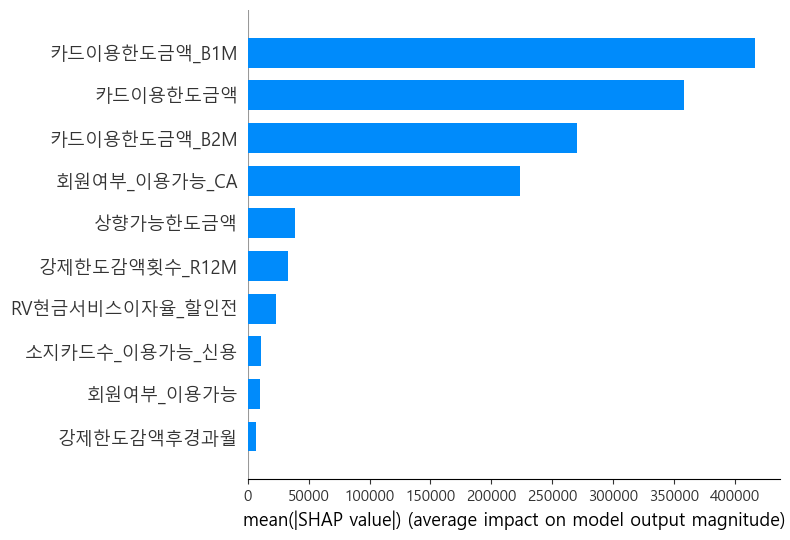

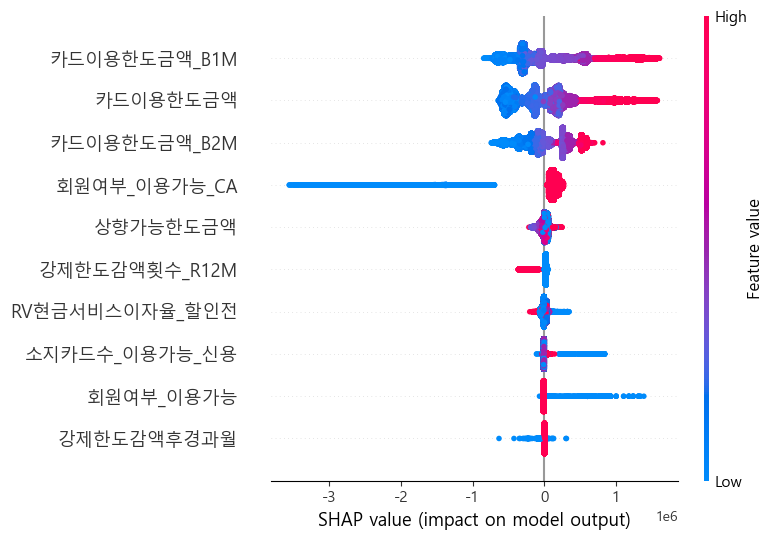

In [13]:
import shap
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import xgboost as xgb
from sklearn.model_selection import train_test_split
import platform  # Importing platform module

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux or Colab
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GPU ÏÇ¨Ïö© ÏïàÌïòÎèÑÎ°ù XGBoost ÏÑ§Ï†ï
model = xgb.XGBRegressor(n_estimators=100, max_depth=4, tree_method='hist', predictor='cpu_predictor', random_state=42)
model.fit(X_train, y_train)

# TreeExplainer ÏÇ¨Ïö©
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)  # ‚úÖ additivity check ÎπÑÌôúÏÑ±Ìôî

# Summary plot - bar
shap.summary_plot(shap_values, X_test, plot_type="bar")
# Summary plot - dot
shap.summary_plot(shap_values, X_test)

## ÌîºÏ≤òÏóîÏßÄÎãàÏñ¥ÎßÅ

In [14]:
import numpy as np

# Î≥µÏÇ¨Î≥∏ ÏÉùÏÑ±
X = X.copy()

# ‚úÖ 1. ÌïúÎèÑ Î≥ÄÌôîÏú®
X["ÌïúÎèÑ_Ï¶ùÍ∞êÏú®"] = (
    (X["Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°"] - ((X["Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M"] + X["Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M"]) / 2)) /
    (((X["Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M"] + X["Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M"]) / 2) + 1)
)

# ‚úÖ 2. ÌèâÍ∑† ÌïúÎèÑ (B1M, B2M, ÌòÑÏû¨)
X["Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑ_ÌèâÍ∑†"] = (
    X["Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°"] + X["Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B1M"] + X["Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°_B2M"]
) / 3

# ‚úÖ 3. ÏÉÅÌñ• Í∞ÄÎä• Ïó¨Î∂Ä (Ïù¥ÏßÑÌôî)
X["ÏÉÅÌñ•Í∞ÄÎä•Ïó¨Î∂Ä"] = (X["ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°"] > 0).astype(int)

# ‚úÖ 4. Ïù¥ÏûêÏú® x ÌïúÎèÑ ÏÉÅÌò∏ÏûëÏö© ‚Üí Î°úÍ∑∏ Î≥ÄÌôò
X["Ïù¥ÏûêÏú®xÌïúÎèÑ"] = X["RVÌòÑÍ∏àÏÑúÎπÑÏä§Ïù¥ÏûêÏú®_Ìï†Ïù∏Ï†Ñ"] * X["Ïπ¥ÎìúÏù¥Ïö©ÌïúÎèÑÍ∏àÏï°"]
X["Ïù¥ÏûêÏú®xÌïúÎèÑ"] = X["Ïù¥ÏûêÏú®xÌïúÎèÑ"].fillna(0).clip(upper=10_000_000).apply(np.log1p)

# ‚úÖ 5. Í∞êÏï° Í∞ïÎèÑ: Í∞êÏï°ÌöüÏàò / (ÌõÑÍ≤ΩÍ≥ºÏõî + 1)
X["Í∞êÏï°Í∞ïÎèÑ"] = X["Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M"] / (X["Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî"] + 1)

# ‚úÖ 6. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
X = X.fillna(0)

drop_features = [
    "ÏÉÅÌñ•Í∞ÄÎä•ÌïúÎèÑÍ∏àÏï°", "Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌõÑÍ≤ΩÍ≥ºÏõî", "Í∞ïÏ†úÌïúÎèÑÍ∞êÏï°ÌöüÏàò_R12M"
]
X.drop(columns=drop_features, inplace=True)

### Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†

In [15]:
from sklearn.model_selection import train_test_split

# 1Îã®Í≥Ñ: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 10%Î•º ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú Î∂ÑÌï†
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# 2Îã®Í≥Ñ: ÎÇ®ÏùÄ 90%ÏóêÏÑú 7:2 ÎπÑÏú®Î°ú train/validation Î∂ÑÌï†
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=2/9, random_state=42
)

# ÏµúÏ¢Ö ÌôïÏù∏
print(f"Train size: {X_train.shape[0]} rows")
print(f"Validation size: {X_val.shape[0]} rows")
print(f"Test size: {X_test.shape[0]} rows")

Train size: 611108 rows
Validation size: 174603 rows
Test size: 87302 rows


### Í∑∏ÎÉ• Î™®Îç∏

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pickle
import os

# üîß ÌîºÌÅ¥ Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
pickle_dir = "ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_Î™®Îç∏Î≥ÑÌîºÌÅ¥"
os.makedirs(pickle_dir, exist_ok=True)

# Î™®Îç∏ Ï†ïÏùò
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

results = {}

# ÌïôÏäµ Î∞è ÌèâÍ∞Ä + Î™®Îç∏ Ï†ÄÏû•
for name, model in models.items():
    print(f"üîÑ Training model: {name}")
    model.fit(X_train, y_train)

    # ‚ñ∂ ÌîºÌÅ¥Î°ú Ï†ÄÏû• (Î™®Îç∏Î≥ÑÌîºÌÅ¥ ÎîîÎ†âÌÜ†Î¶¨ ÎÇ¥Î∂Ä)
    filename = os.path.join(pickle_dir, f"model_{name}.pkl")
    with open(filename, "wb") as f:
        pickle.dump(model, f)
    print(f" Î™®Îç∏ Ï†ÄÏû• ÏôÑ: {filename}")

    # ‚ñ∂ Train ÏÑ±Îä•
    train_preds = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_preds)
    train_r2 = r2_score(y_train, train_preds)

    # ‚ñ∂ Test ÏÑ±Îä•
    test_preds = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_preds)
    test_r2 = r2_score(y_test, test_preds)

    # ‚ñ∂ Í≤∞Í≥º Ï†ÄÏû•
    results[name] = {
        "Train MSE": train_mse,
        "Train R2": train_r2,
        "Test MSE": test_mse,
        "Test R2": test_r2,
    }

# Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†•
results_df = pd.DataFrame(results).T
print("üìä Î™®Îç∏Î≥Ñ Train & Test ÏÑ±Îä• ÎπÑÍµê")
display(results_df)

üîÑ Training model: RandomForest
 Î™®Îç∏ Ï†ÄÏû• ÏôÑ: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_Î™®Îç∏Î≥ÑÌîºÌÅ¥\model_RandomForest.pkl
üîÑ Training model: XGBoost
 Î™®Îç∏ Ï†ÄÏû• ÏôÑ: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_Î™®Îç∏Î≥ÑÌîºÌÅ¥\model_XGBoost.pkl
üîÑ Training model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1805
[LightGBM] [Info] Number of data points in the train set: 611108, number of used features: 12
[LightGBM] [Info] Start training from score 2224731.302102
 Î™®Îç∏ Ï†ÄÏû• ÏôÑ: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_Î™®Îç∏Î≥ÑÌîºÌÅ¥\model_LightGBM.pkl
üîÑ Training model: CatBoost
 Î™®Îç∏ Ï†ÄÏû• ÏôÑ: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_Î™®Îç∏Î≥ÑÌîºÌÅ¥\model_CatBoost.pkl
üìä Î™®Îç∏Î≥Ñ Train & Test ÏÑ±Îä• ÎπÑÍµê


Train MSE  Train R2      Test MSE   Test R2
RandomForest  8.230416e+09  0.996148  5.831111e+10  0.972734
XGBoost       5.408819e+10  0.974687  5.585179e+10  0.973884
LightGBM      5.668173e+10  0.973473  5.681690e+10  0.973433
CatBoost      5.441138e+10  0.974536  5.551451e+10  0.974042

### Í∑∏ÎÉ• Î™®Îç∏ ÏãúÍ∞ÅÌôî

In [17]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows/Mac/Linux Í≥µÏö©)
if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# ‚úÖ Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨
output_dir = "ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_Î™®Îç∏Î≥ÑÏÑ±Îä•ÏãúÍ∞ÅÌôî"
os.makedirs(output_dir, exist_ok=True)

# ‚úÖ CatBoost Î™®Îç∏Îßå Ïã§Ìñâ
name = "CatBoost"
model = models["CatBoost"]

print(f"\nüìä SHAP Feature Importance for {name}")

try:
    # Tree SHAP ÏÇ¨Ïö©
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    # SHAP Î∞îÍ∑∏ÎûòÌîÑ
    plt.figure()
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    plt.title(f"SHAP Summary - {name}")
    plt.tight_layout()
    shap_path = os.path.join(output_dir, f"shap_summary_{name}.png")
    plt.savefig(shap_path, dpi=300)
    plt.close()
    print(f"‚úÖ SHAP Ï†ÄÏû• ÏôÑÎ£å: {shap_path}")
except Exception as e:
    print(f"‚ùå SHAP Ïã§Ìå® ({name}): {e}")

print(f"\nüîç LIME Explanation for {name}")

try:
    lime_explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X.columns.tolist(),
        mode="regression"
    )
    lime_exp = lime_explainer.explain_instance(
        X_test.values[0],
        model.predict
    )

    # ÏãúÍ∞ÅÌôî Ï†ÄÏû•
    fig = lime_exp.as_pyplot_figure()
    lime_path = os.path.join(output_dir, f"lime_summary_{name}.png")
    fig.savefig(lime_path, dpi=300)
    plt.close(fig)
    print(f"‚úÖ LIME Ï†ÄÏû• ÏôÑÎ£å: {lime_path}")
except Exception as e:
    print(f"‚ùå LIME Ïã§Ìå® ({name}): {e}")


üìä SHAP Feature Importance for CatBoost
‚úÖ SHAP Ï†ÄÏû• ÏôÑÎ£å: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_Î™®Îç∏Î≥ÑÏÑ±Îä•ÏãúÍ∞ÅÌôî\shap_summary_CatBoost.png

üîç LIME Explanation for CatBoost
‚úÖ LIME Ï†ÄÏû• ÏôÑÎ£å: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_Î™®Îç∏Î≥ÑÏÑ±Îä•ÏãúÍ∞ÅÌôî\lime_summary_CatBoost.png


### ÌïòÏù¥Ïñ¥ÌååÎùºÎØ∏ÌÑ∞ÌäúÎãù

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import os

# Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨
pickle_dir = "ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_ÌäúÎãùÎêúÎ™®Îç∏Î≥ÑÌîºÌÅ¥"
os.makedirs(pickle_dir, exist_ok=True)

# ÌäúÎãùÌï† Î™®Îç∏Í≥º ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
model_grids = {
    "RandomForest": (
        RandomForestRegressor(random_state=42),
        {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    ),
    "XGBoost": (
        XGBRegressor(random_state=42, verbosity=0),
        {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.1, 0.01]
        }
    ),
    "LightGBM": (
        LGBMRegressor(random_state=42),
        {
            'n_estimators': [100, 200],
            'max_depth': [-1, 5, 10],
            'learning_rate': [0.1, 0.01]
        }
    ),
    "CatBoost": (
        CatBoostRegressor(verbose=0, random_state=42),
        {
            'depth': [4, 6, 8],
            'learning_rate': [0.1, 0.01],
            'iterations': [100, 200]
        }
    )
}

results = {}
best_params = {}

# ÌäúÎãù + ÌïôÏäµ + ÌèâÍ∞Ä + Ï†ÄÏû•
for name, (model, param_grid) in model_grids.items():
    print(f"\nüîÑ GridSearchCV tuning: {name}")
    grid = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_params[name] = grid.best_params_

    # Ï†ÄÏû•
    filename = os.path.join(pickle_dir, f"model_{name}_tuned.pkl")
    with open(filename, "wb") as f:
        pickle.dump(best_model, f)
    print(f"‚úÖ ÌäúÎãùÎêú Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: {filename}")

    # ÌèâÍ∞Ä
    train_preds = best_model.predict(X_train)
    test_preds = best_model.predict(X_test)

    results[name] = {
        "Train MSE": mean_squared_error(y_train, train_preds),
        "Train R2": r2_score(y_train, train_preds),
        "Test MSE": mean_squared_error(y_test, test_preds),
        "Test R2": r2_score(y_test, test_preds),
    }

# Í≤∞Í≥º ÌÖåÏù¥Î∏î Ï∂úÎ†•
results_df = pd.DataFrame(results).T
print("üìä ÌäúÎãùÎêú Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê")
display(results_df)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("üîß ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞")
for name, params in best_params.items():
    print(f"{name}: {params}")


üîÑ GridSearchCV tuning: RandomForest
‚úÖ ÌäúÎãùÎêú Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_ÌäúÎãùÎêúÎ™®Îç∏Î≥ÑÌîºÌÅ¥\model_RandomForest_tuned.pkl

üîÑ GridSearchCV tuning: XGBoost
‚úÖ ÌäúÎãùÎêú Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_ÌäúÎãùÎêúÎ™®Îç∏Î≥ÑÌîºÌÅ¥\model_XGBoost_tuned.pkl

üîÑ GridSearchCV tuning: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1805
[LightGBM] [Info] Number of data points in the train set: 611108, number of used features: 12
[LightGBM] [Info] Start training from score 2224731.302102
‚úÖ ÌäúÎãùÎêú Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_ÌäúÎãùÎêúÎ™®Îç∏Î≥ÑÌîºÌÅ¥\model_LightGBM_tuned.pkl

üîÑ GridSearchCV tuning: CatBoost
‚úÖ ÌäúÎãùÎêú Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_ÌäúÎãùÎêúÎ™®Îç∏Î≥ÑÌîºÌÅ¥\model_CatBoost_tuned.pkl
üìä ÌäúÎãùÎêú Î™®Îç∏ ÏÑ±Îä• 

Train MSE  Train R2      Test MSE   Test R2
RandomForest  5.679582e+10  0.973420  5.800082e+10  0.972879
XGBoost       5.461889e+10  0.974439  5.577675e+10  0.973919
LightGBM      5.544701e+10  0.974051  5.601085e+10  0.973810
CatBoost      5.671121e+10  0.973460  5.690886e+10  0.973390

üîß ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
RandomForest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
LightGBM: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200}
CatBoost: {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}


### ÌïòÏù¥Ïñ¥ÌååÎùºÎØ∏ÌÑ∞ÌäúÎãùÏãúÍ∞ÅÌôî

In [20]:
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

from sklearn.ensemble import RandomForestRegressor  # ÌïÑÏöî Ïãú Ï∂îÍ∞Ä

# üî† ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Ïö¥ÏòÅÏ≤¥Ï†úÎ≥Ñ Î∂ÑÍ∏∞)
if os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')  # Windows
else:
    plt.rc('font', family='AppleGothic')   # macOS / Linux
plt.rcParams['axes.unicode_minus'] = False

# üìÅ Í≤∞Í≥º Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨ ÏÑ§Ï†ï
output_dir = "RandomForest_Ìï¥ÏÑùÏãúÍ∞ÅÌôî"
os.makedirs(output_dir, exist_ok=True)

# üîç Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ (Ïòà: ÌäúÎãùÎêú RandomForest)
rf_model = tuned_models["RandomForest"]  # ÎòêÎäî ÏßÅÏ†ë Ï†ïÏùòÎêú Î™®Îç∏ ÏÇ¨Ïö©

# ‚úÖ SHAP ÏãúÍ∞ÅÌôî
print("\nüìä SHAP Feature Importance for RandomForest")
try:
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X_test)

    plt.figure()
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    plt.title("SHAP Summary - RandomForest")
    plt.tight_layout()
    shap_path = os.path.join(output_dir, "shap_summary_RandomForest.png")
    plt.savefig(shap_path, dpi=300)
    plt.close()
    print(f"‚úÖ SHAP Ï†ÄÏû• ÏôÑÎ£å: {shap_path}")
except Exception as e:
    print(f"‚ùå SHAP Ïã§Ìå®: {e}")

# ‚úÖ LIME ÏãúÍ∞ÅÌôî
print("üîç LIME Explanation for RandomForest")
try:
    lime_explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X.columns.tolist(),
        mode="regression"
    )
    lime_exp = lime_explainer.explain_instance(
        X_test.values[0],  # ÏÉòÌîå ÌïòÎÇò
        rf_model.predict
    )

    fig = lime_exp.as_pyplot_figure()
    lime_path = os.path.join(output_dir, "lime_summary_RandomForest.png")
    fig.savefig(lime_path, dpi=300)
    plt.close(fig)
    print(f"‚úÖ LIME Ï†ÄÏû• ÏôÑÎ£å: {lime_path}")
except Exception as e:
    print(f"‚ùå LIME Ïã§Ìå®: {e}")

NameError: name 'tuned_models' is not defined

### ÍµêÏ∞® Í≤ÄÏ¶ù

üîÅ ÌäúÎãùÎêú Î™®Îç∏Îì§Ïóê ÎåÄÌï¥ Validation Í∏∞Î∞ò ÍµêÏ∞®Í≤ÄÏ¶ù (5-Fold) ÏãúÏûë

üìå RandomForest
  ‚úÖ R2: 0.9727 ¬± 0.0002
  ‚úÖ MSE: 58244083999.2104 ¬± 398666287.4509
  ‚úÖ MAE: 177392.6671 ¬± 610.3591
  ‚úÖ RMSE: 241336.6952 ¬± 826.7559

üìå XGBoost
  ‚úÖ R2: 0.9735 ¬± 0.0002
  ‚úÖ MSE: 56543434395.8687 ¬± 570183395.6980
  ‚úÖ MAE: 175238.6272 ¬± 749.7759
  ‚úÖ RMSE: 237785.6042 ¬± 1200.3545

üìå LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1804
[LightGBM] [Info] Number of data points in the train set: 139682, number of used features: 12
[LightGBM] [Info] Start training from score 2222776.227424
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if

R2 Mean    R2 Std      MSE Mean       MSE Std       MAE Mean  \
RandomForest  0.972691  0.000222  5.824408e+10  3.986663e+08  177392.667133   
XGBoost       0.973489  0.000177  5.654343e+10  5.701834e+08  175238.627175   
LightGBM      0.973354  0.000174  5.683081e+10  5.531018e+08  175711.529787   
CatBoost      0.973159  0.000230  5.724866e+10  6.993237e+08  176751.449536   

                 MAE Std      RMSE Mean     RMSE Std  
RandomForest  610.359116  241336.695249   826.755935  
XGBoost       749.775866  237785.604158  1200.354515  
LightGBM      757.801587  238389.294155  1161.718939  
CatBoost      935.930969  239262.449237  1463.597112

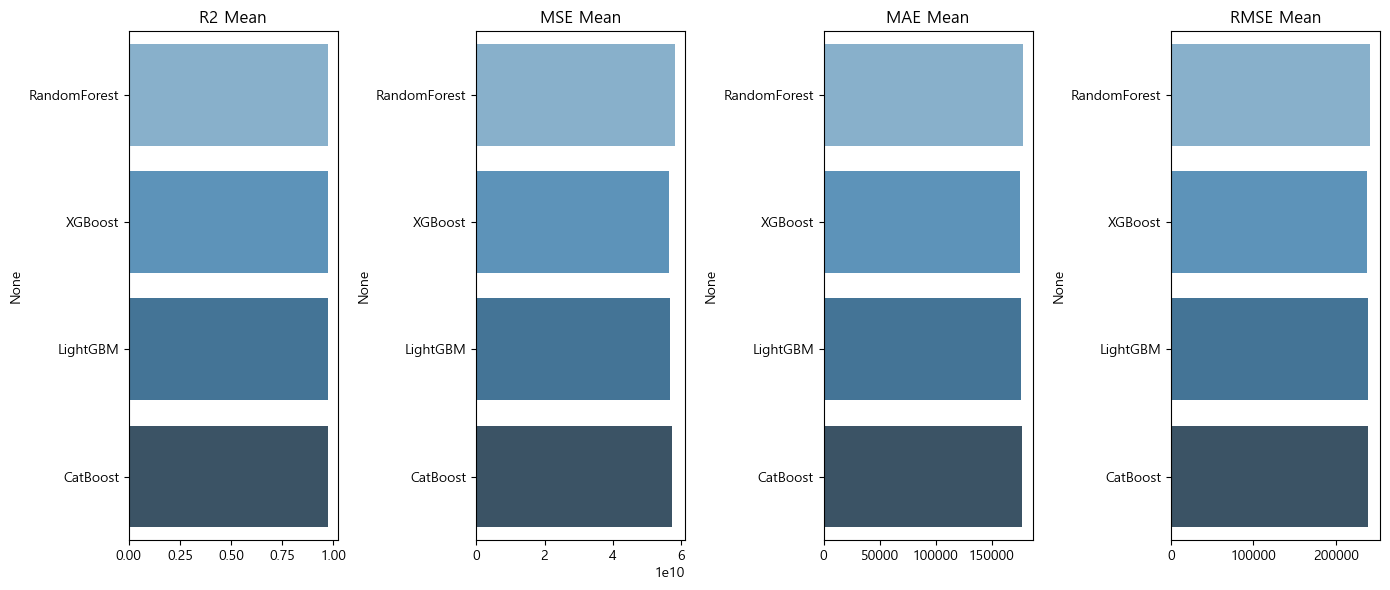


üìÇ ÏãúÍ∞ÅÌôî Ï†ÄÏû• ÏôÑÎ£å: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_ÌäúÎãùÎêúÎ™®Îç∏_ÍµêÏ∞®Í≤ÄÏ¶ùÏãúÍ∞ÅÌôî\ÍµêÏ∞®Í≤ÄÏ¶ù_ÏÑ±Îä•ÎπÑÍµê.png
üìÇ ÏÑ±Îä•Ìëú Ï†ÄÏû• ÏôÑÎ£å: ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_ÌäúÎãùÎêúÎ™®Îç∏_ÍµêÏ∞®Í≤ÄÏ¶ùÏãúÍ∞ÅÌôî\ÍµêÏ∞®Í≤ÄÏ¶ù_ÏÑ±Îä•ÎπÑÍµêÌëú.csv


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

# üíæ ÌäúÎãùÎêú Î™®Îç∏ Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨
pickle_dir = "ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_ÌäúÎãùÎêúÎ™®Îç∏Î≥ÑÌîºÌÅ¥"

# ÏãúÍ∞ÅÌôî Í≤∞Í≥º Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨
vis_dir = "ÎÖ∏ÎßêÎç∞Ïù¥ÌÑ∞_ÌäúÎãùÎêúÎ™®Îç∏_ÍµêÏ∞®Í≤ÄÏ¶ùÏãúÍ∞ÅÌôî"
os.makedirs(vis_dir, exist_ok=True)

# Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
cv_results_all = {}

# ÏÇ¨Ïö©Ìï† ÏßÄÌëú
scoring_metrics = {
    'R2': 'r2',
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'RMSE': 'neg_root_mean_squared_error'  # ÏùºÎ∂Ä sklearn Î≤ÑÏ†ÑÏóêÏÑúÎßå ÏûëÎèô
}

print("üîÅ ÌäúÎãùÎêú Î™®Îç∏Îì§Ïóê ÎåÄÌï¥ Validation Í∏∞Î∞ò ÍµêÏ∞®Í≤ÄÏ¶ù (5-Fold) ÏãúÏûë\n")

# Í∞Å Î™®Îç∏Ïóê ÎåÄÌï¥ Î∞òÎ≥µ
for name in model_grids.keys():
    print(f"üìå {name}")
    filename = os.path.join(pickle_dir, f"model_{name}_tuned.pkl")
    with open(filename, "rb") as f:
        model = pickle.load(f)

    model_results = {}
    
    for metric_name, scoring in scoring_metrics.items():
        try:
            scores = cross_val_score(model, X_val, y_val, cv=5, scoring=scoring)
            if "neg_" in scoring:
                scores = -scores
            model_results[f"{metric_name} Mean"] = np.mean(scores)
            model_results[f"{metric_name} Std"] = np.std(scores)
            print(f"  ‚úÖ {metric_name}: {np.mean(scores):.4f} ¬± {np.std(scores):.4f}")
        except Exception as e:
            model_results[f"{metric_name} Mean"] = None
            model_results[f"{metric_name} Std"] = None
            print(f"  ‚ùå {metric_name} Ïã§Ìå®: {e}")
    
    cv_results_all[name] = model_results
    print()

# üìä Í≤∞Í≥º DataFrame Ï†ïÎ¶¨
cv_results_df = pd.DataFrame(cv_results_all).T
print("üìä ÍµêÏ∞®Í≤ÄÏ¶ù Ï¢ÖÌï© Í≤∞Í≥º (Validation Í∏∞Ï§Ä)")
display(cv_results_df)

# üìà ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
metrics_to_plot = ['R2 Mean', 'MSE Mean', 'MAE Mean', 'RMSE Mean']
for i, metric in enumerate(metrics_to_plot, 1):
    if metric in cv_results_df.columns:
        plt.subplot(1, 4, i)
        sns.barplot(
            y=cv_results_df.index,
            x=cv_results_df[metric],
            palette='Blues_d'
        )
        plt.title(metric)
        plt.xlabel('')
        plt.tight_layout()

# Ï†ÄÏû•
plot_path = os.path.join(vis_dir, "ÍµêÏ∞®Í≤ÄÏ¶ù_ÏÑ±Îä•ÎπÑÍµê.png")
plt.savefig(plot_path, dpi=300)
plt.show()

# üìÑ CSV Ï†ÄÏû•
csv_path = os.path.join(vis_dir, "ÍµêÏ∞®Í≤ÄÏ¶ù_ÏÑ±Îä•ÎπÑÍµêÌëú.csv")
cv_results_df.to_csv(csv_path)

print(f"\nüìÇ ÏãúÍ∞ÅÌôî Ï†ÄÏû• ÏôÑÎ£å: {plot_path}")
print(f"üìÇ ÏÑ±Îä•Ìëú Ï†ÄÏû• ÏôÑÎ£å: {csv_path}")